In [209]:
import pandas as pd 
df = pd.read_csv("House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [211]:
df = df.drop(["Posted On", "Area Locality", "Point of Contact"], axis = 1)
df["Price per size"] = df["Rent"] / df["Size"]

In [212]:
df.isnull().sum()

BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Price per size       0
dtype: int64

In [213]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
list = ["Area Type", "Furnishing Status", "Tenant Preferred"]
df[list] = encoder.fit_transform(list)
df.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price per size
0,2,10000,1100,Ground out of 2,0,Kolkata,1,2,2,9.090909
1,2,20000,800,1 out of 3,0,Kolkata,1,2,1,25.000000
2,2,17000,1000,1 out of 3,0,Kolkata,1,2,1,17.000000
3,2,10000,800,1 out of 2,0,Kolkata,1,2,1,12.500000
4,2,7500,850,1 out of 2,0,Kolkata,1,2,1,8.823529


In [214]:
floor_avg = df.groupby("Floor")["Rent"].mean()
df["Floor"] = df["Floor"].map(floor_avg)

In [215]:
X = df.drop("Rent", axis = 1)
y = df["Rent"]
X = pd.get_dummies(X, columns=["City"], drop_first=True)

In [216]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [217]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [219]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
print(score)
#print(model.score(X_test, y_test))

0.7005299833238054


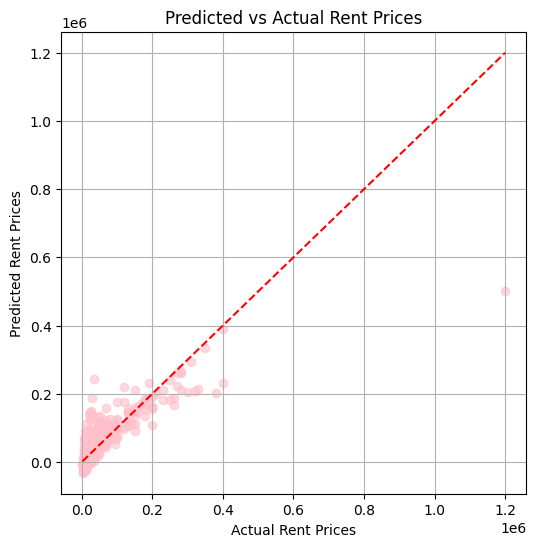

In [220]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='pink')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel("Actual Rent Prices")
plt.ylabel("Predicted Rent Prices")
plt.title("Predicted vs Actual Rent Prices")
plt.grid(True)
plt.show()